In [21]:
import os
import scipy.io
import mne
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa các file .mat đã giải nén
data_root = 'eeg_data'

# Lấy danh sách tất cả các file .mat trong thư mục
mat_files = [f for f in os.listdir(data_root) if f.endswith('.mat')]

# Duyệt qua từng file .mat
for mat_file in mat_files:
    mat_file_path = os.path.join(data_root, mat_file)
    
    # Đọc file .mat
    mat = scipy.io.loadmat(mat_file_path)

    # Trích xuất thông tin từ trường 'o'
    try:
        # Truy xuất sample frequency (sampFreq)
        samp_freq = mat['o']['sampFreq'][0, 0][0][0]

        # Truy xuất dữ liệu (data)
        data = mat['o']['data'][0, 0]

        # In ra thông tin kiểm tra
        print(f"File: {mat_file}")
        print(f"Sample Frequency: {samp_freq}")
        print(f"Data Shape: {data.shape}")
        print(f"First 5 data points:\n{data[:5]}")
    
    except KeyError as e:
        print(f"Missing key in file {mat_file}: {e}")


File: eeg_record1.mat
Sample Frequency: 128
Data Shape: (308868, 25)
First 5 data points:
[[3.00000000e+00 0.00000000e+00 4.63000000e+02 4.44000000e+03
  4.41794872e+03 5.39076923e+03 3.83384615e+03 4.01948718e+03
  4.65641026e+03 4.74205128e+03 4.41538462e+03 4.53846154e+03
  4.30820513e+03 4.12564103e+03 4.28358974e+03 4.33538462e+03
  4.56358974e+03 1.57300000e+03 1.72600000e+03 7.64304000e+02
  3.12768780e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.00000000e+00 0.00000000e+00 0.00000000e+00 4.43948718e+03
  4.41794872e+03 5.38923077e+03 3.83025641e+03 4.02000000e+03
  4.65897436e+03 4.73897436e+03 4.41487179e+03 4.53589744e+03
  4.30820513e+03 4.13641026e+03 4.28461538e+03 4.33179487e+03
  4.56666667e+03 1.57000000e+03 1.72700000e+03 7.64304000e+02
  3.12768780e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [5.00000000e+00 0.00000000e+00 4.47000000e+02 4.43897436e+03
  4.41487179e+03 5.38564103e+03 3.82974359e+03 4.01794872e+03
  4.65

In [22]:
import numpy as np

channel_indices = np.array(range(3, 17))
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
channel_map = dict(zip(channel_names, channel_indices))

In [25]:
import pandas as pd

df = pd.DataFrame.from_dict(data)

In [27]:
# Lấy số lượng mẫu từ dữ liệu
num_samples = data.shape[0]  # Số dòng trong ma trận `data`

# Tần số lấy mẫu (Hz)
samp_freq = 128  # Theo mô tả, tần số lấy mẫu là 128 Hz

# Tính thời gian thí nghiệm (giây)
experiment_duration = num_samples / samp_freq

# Hiển thị kết quả
print(f"Thời gian của thí nghiệm là {experiment_duration:.2f} giây.")
print(f"Tương đương {experiment_duration / 60:.2f} phút.")


Thời gian của thí nghiệm là 3037.41 giây.
Tương đương 50.62 phút.


Text(0, 0.5, 'EEG channel AF3')

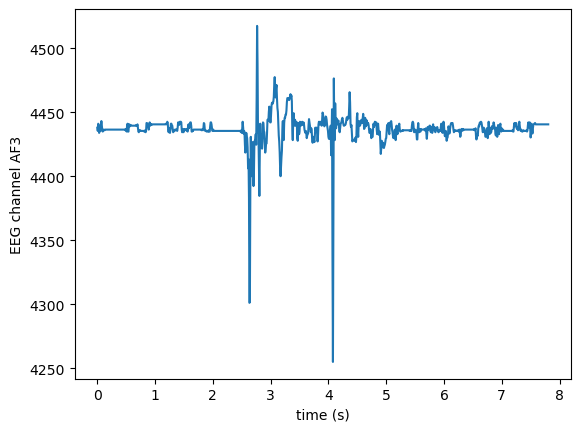

In [29]:
i_ch = 0
time = np.arange(1000) / samp_freq
channel = data[:1000, channel_indices[i_ch]]
plt.plot(time, channel)
plt.xlabel('time (s)')
plt.ylabel(f'EEG channel {channel_names[i_ch]}')

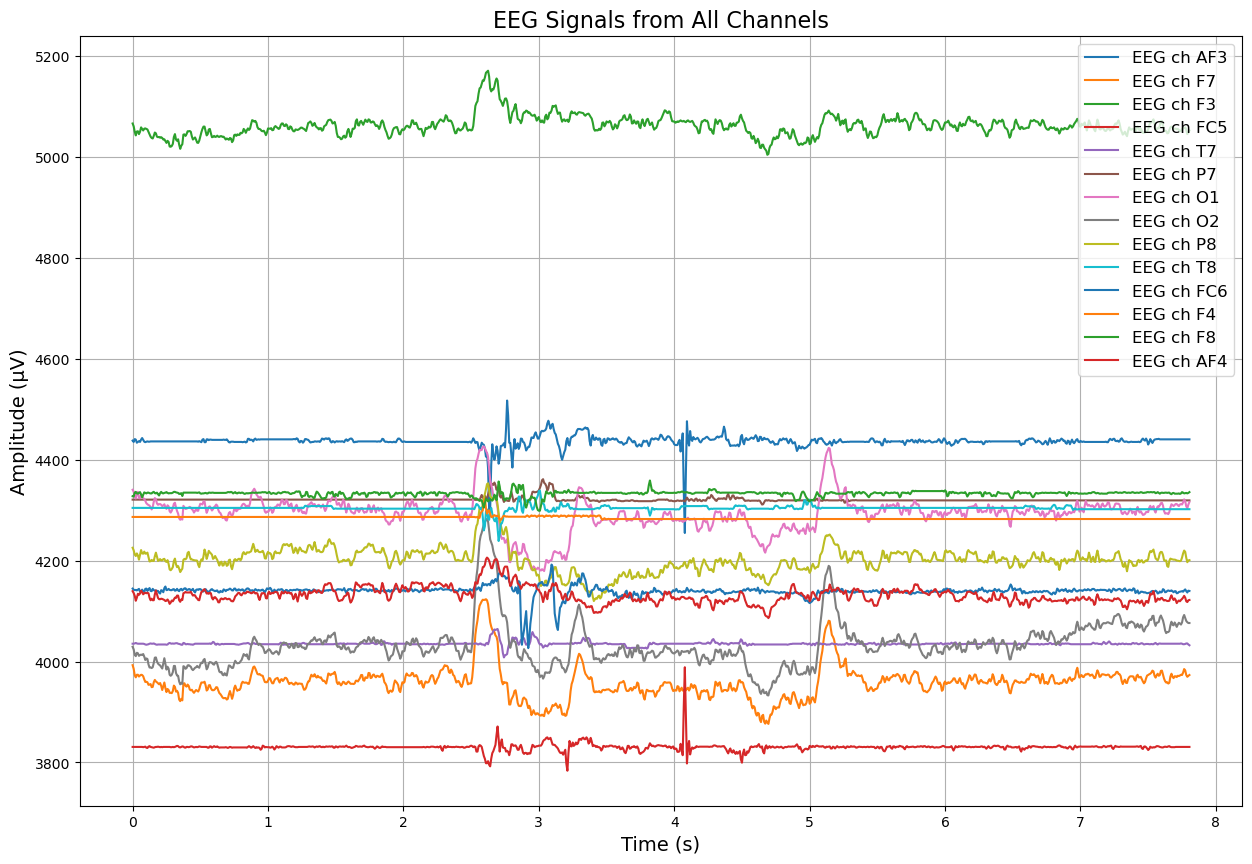

In [31]:
# Giả sử `data` là dữ liệu EEG đã tải
time = np.arange(1000) / samp_freq  # Tạo trục thời gian với 1000 mẫu
plt.figure(figsize=(15, 10))  # Tăng kích thước đồ thị

# Vẽ tất cả các kênh
for i_ch, ch_name in enumerate(channel_names):
    channel = data[:1000, channel_indices[i_ch]]
    plt.plot(time, channel, label=f'EEG ch {ch_name}')

# Thêm nhãn và chú thích
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (μV)', fontsize=14)
plt.title('EEG Signals from All Channels', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Hiển thị đồ thị
plt.show()

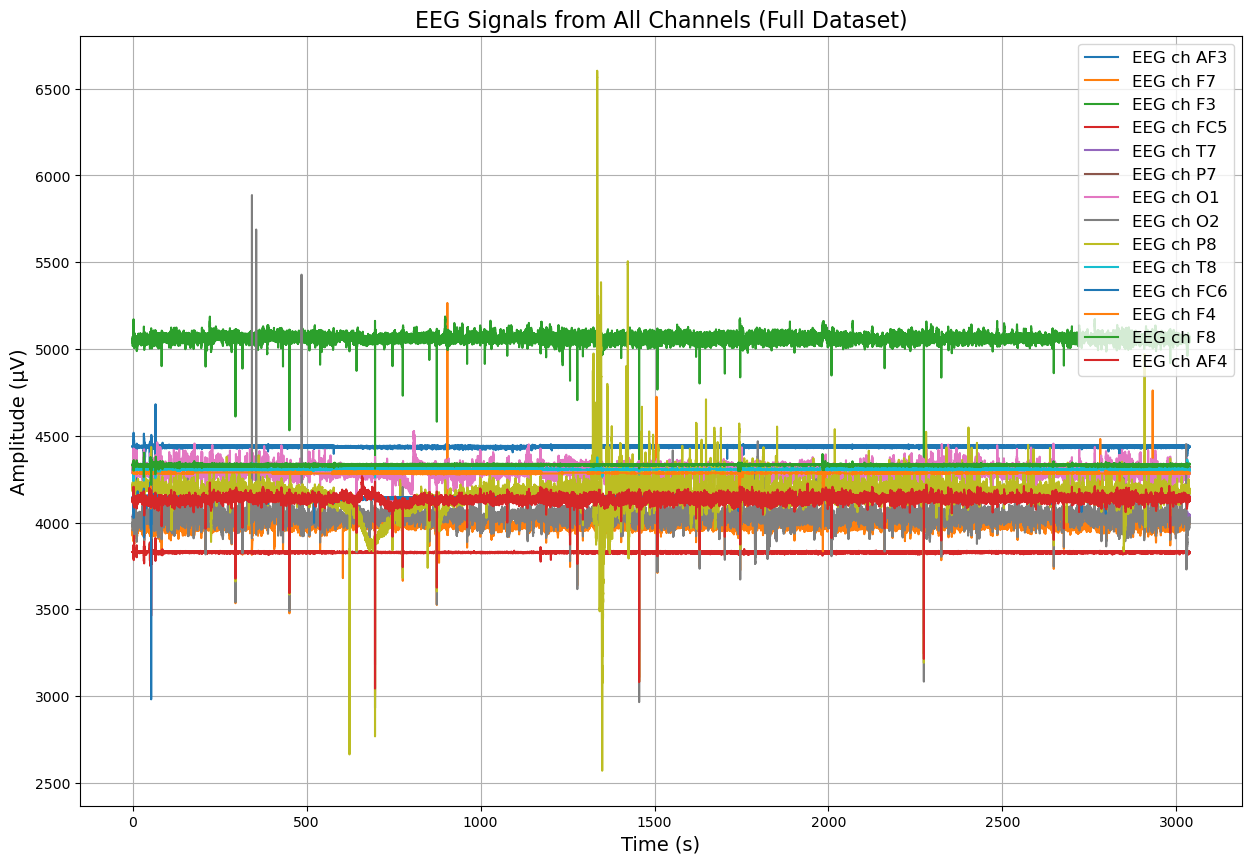

In [33]:
# Tạo trục thời gian cho toàn bộ dữ liệu
time = np.arange(data.shape[0]) / samp_freq  # Trục thời gian với toàn bộ mẫu dữ liệu

plt.figure(figsize=(15, 10))  # Tăng kích thước đồ thị

# Vẽ tất cả các kênh
for i_ch, ch_name in enumerate(channel_names):
    channel = data[:, channel_indices[i_ch]]  # Lấy toàn bộ dữ liệu của từng kênh
    plt.plot(time, channel, label=f'EEG ch {ch_name}')

# Thêm nhãn và chú thích
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (μV)', fontsize=14)
plt.title('EEG Signals from All Channels (Full Dataset)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Hiển thị đồ thị
plt.show()


In [35]:
states = {
 'focused': data[:samp_freq * 10 * 60, :],
  'unfocused': data[samp_freq * 10 * 60:samp_freq * 20 * 60, :],
  'drowsy': data[samp_freq * 30 * 60:, :],
}

In [37]:
bands = {'alpha': (8, 13), 'delta': (0.5, 4), 'beta': (13, 30), 'gamma': (30, np.inf)}

In [39]:
# Định nghĩa các dải tần số (bands)
bands = {
    'delta': (0.5, 4),   # Delta: 0.5–4 Hz
    'theta': (4, 8),     # Theta: 4–8 Hz
    'alpha': (8, 13),    # Alpha: 8–13 Hz
    'beta': (13, 30),    # Beta: 13–30 Hz
    'gamma': (30, 50)    # Gamma: 30–50 Hz
}


In [41]:
def get_data(filename):
    mat = scipy.io.loadmat(os.path.join(data_root, filename))
    data = mat['o']['data'][0, 0]
    FS = mat['o']['sampFreq'][0][0][0][0]

    states = {
     'focused': data[:FS * 10 * 60, :],
      'unfocused': data[FS * 10 * 60:FS * 20 * 60, :],
      'drowsy': data[FS * 30 * 60:, :],
    }
    return states

In [43]:
def get_powers(channel, FS=128):
    # Loại bỏ NaN hoặc kiểm tra mảng trống
    if channel.size == 0 or np.all(np.isnan(channel)):
        return {band: 0 for band in bands.keys()}  # Gửi trả 0 nếu không có dữ liệu hợp lệ

    # Tiến hành tính toán
    channel = channel - channel.mean()  # Trung bình hóa
    freq, psd = signal.periodogram(channel, fs=FS, nfft=256)

    powers = {}
    for band_name, band_limits in bands.items():
        low, high = band_limits
        band_psd = psd[(freq >= low) & (freq < high)]
        if band_psd.size > 0:
            powers[band_name] = band_psd.mean()
        else:
            powers[band_name] = 0  # Nếu không có giá trị, gán về 0
    return powers


In [13]:
from scipy import signal

rows_list = []
for subject_idx in range(1, 35):
    states = get_data(f"eeg_record{subject_idx}.mat")
    for ch_name, ch_idx in channel_map.items():
        for state, eeg in states.items():
            powers = get_powers(eeg[:, ch_idx])
            powers['state'] = state
            powers['channel'] = ch_name
            powers['subject'] = f"subject_{subject_idx}"
            rows_list.append(powers)

In [14]:
df = pd.DataFrame(rows_list)

In [15]:
df.head()

,delta,theta,alpha,beta,gamma,state,channel,subject
0,0.541343,0.135462,0.045083,0.065691,0.060530,focused,AF3,subject_1
1,0.063098,0.077503,0.051634,0.049342,0.046692,unfocused,AF3,subject_1
2,0.150669,0.166062,0.086027,0.070423,0.065023,drowsy,AF3,subject_1
3,3116.933568,145.284172,41.977120,11.147032,4.077921,focused,F7,subject_1
4,19571.352381,606.100565,178.797955,45.307899,14.941939,unfocused,F7,subject_1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   delta    1428 non-null   float64
 1   theta    1428 non-null   float64
 2   alpha    1428 non-null   float64
 3   beta     1428 non-null   float64
 4   gamma    1428 non-null   float64
 5   state    1428 non-null   object 
 6   channel  1428 non-null   object 
 7   subject  1428 non-null   object 
dtypes: float64(5), object(3)
memory usage: 89.4+ KB


In [17]:
df.describe()

,delta,theta,alpha,beta,gamma
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,553.461715,26.118054,8.298129,1.801507,0.571215
std,9632.498074,587.887679,108.369900,24.643520,7.341878
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134807,0.082104,0.064480,0.054129,0.040856
50%,3.473427,1.056762,0.763063,0.308180,0.122745
75%,33.324547,4.883188,3.396415,0.824476,0.220542
max,346448.527812,21793.089379,3868.057150,855.477578,249.666195


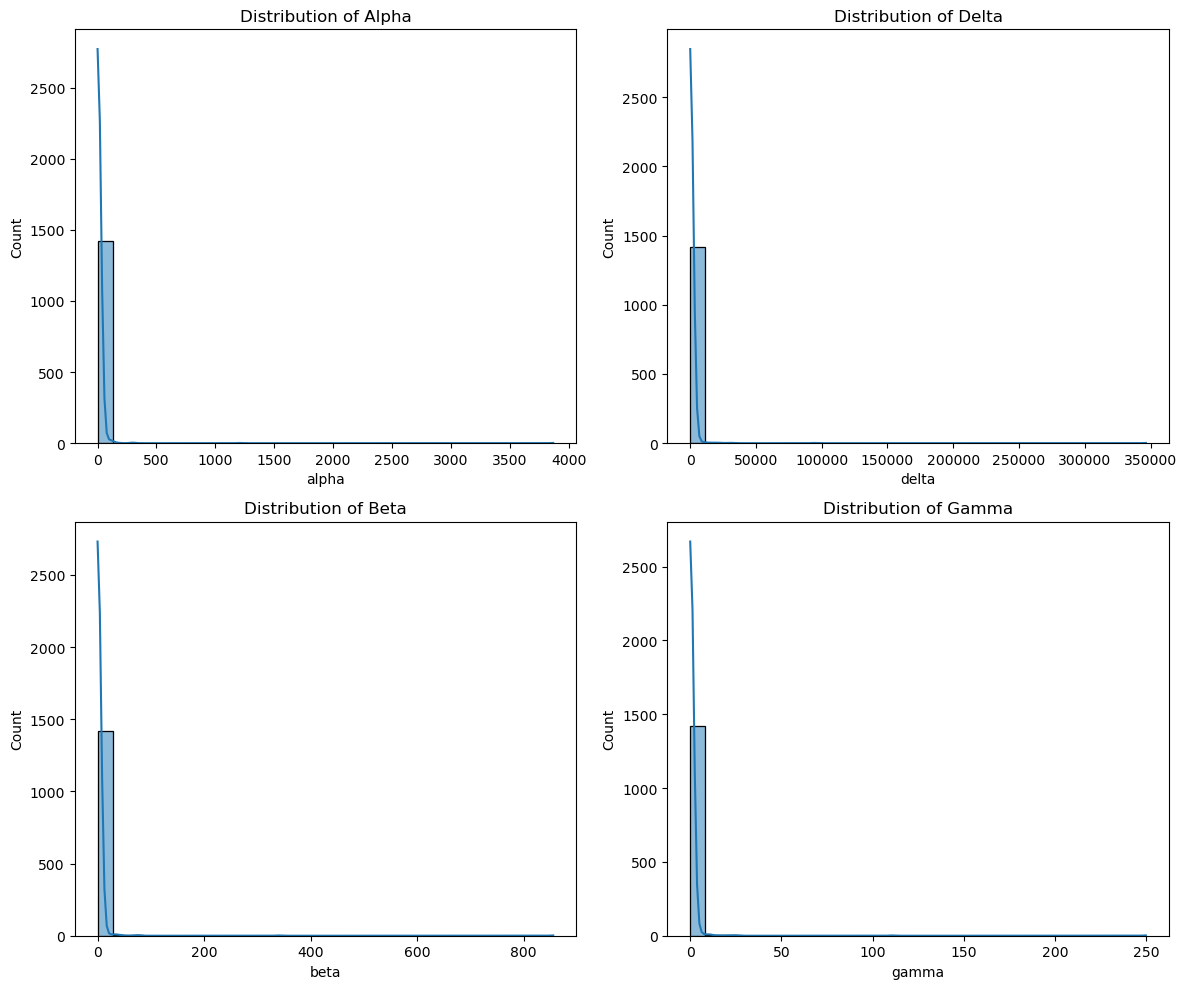

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Vẽ các histogram cho các đặc trưng số (alpha, delta, beta, gamma)
plt.subplot(2, 2, 1)
sns.histplot(df['alpha'], kde=True, bins=30)
plt.title('Distribution of Alpha')

plt.subplot(2, 2, 2)
sns.histplot(df['delta'], kde=True, bins=30)
plt.title('Distribution of Delta')

plt.subplot(2, 2, 3)
sns.histplot(df['beta'], kde=True, bins=30)
plt.title('Distribution of Beta')

plt.subplot(2, 2, 4)
sns.histplot(df['gamma'], kde=True, bins=30)
plt.title('Distribution of Gamma')

# Hiển thị các đồ thị
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    """
    Loại bỏ outliers cho các cột chỉ định trong DataFrame bằng phương pháp IQR (Interquartile Range).
    
    Args:
    - df: DataFrame chứa dữ liệu
    - columns: Danh sách các tên cột cần kiểm tra và loại bỏ outliers
    
    Returns:
    - DataFrame đã loại bỏ outliers
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Tính Q1
        Q3 = df[col].quantile(0.75)  # Tính Q3
        IQR = Q3 - Q1  # Tính khoảng IQR
        
        lower_bound = Q1 - 1.5 * IQR  # Giới hạn dưới
        upper_bound = Q3 + 1.5 * IQR  # Giới hạn trên
        
        # Lọc bỏ các giá trị ngoài giới hạn
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

columns_to_check = ['alpha', 'delta', 'beta', 'gamma']
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# In DataFrame đã loại bỏ outliers
df_cleaned.head()


,delta,theta,alpha,beta,gamma,state,channel,subject
0,0.541343,0.135462,0.045083,0.065691,0.060530,focused,AF3,subject_1
1,0.063098,0.077503,0.051634,0.049342,0.046692,unfocused,AF3,subject_1
2,0.150669,0.166062,0.086027,0.070423,0.065023,drowsy,AF3,subject_1
5,26.952368,2.482703,1.458295,0.523827,0.328282,drowsy,F7,subject_1
8,24.419189,2.917379,2.187508,0.529856,0.309613,drowsy,F3,subject_1


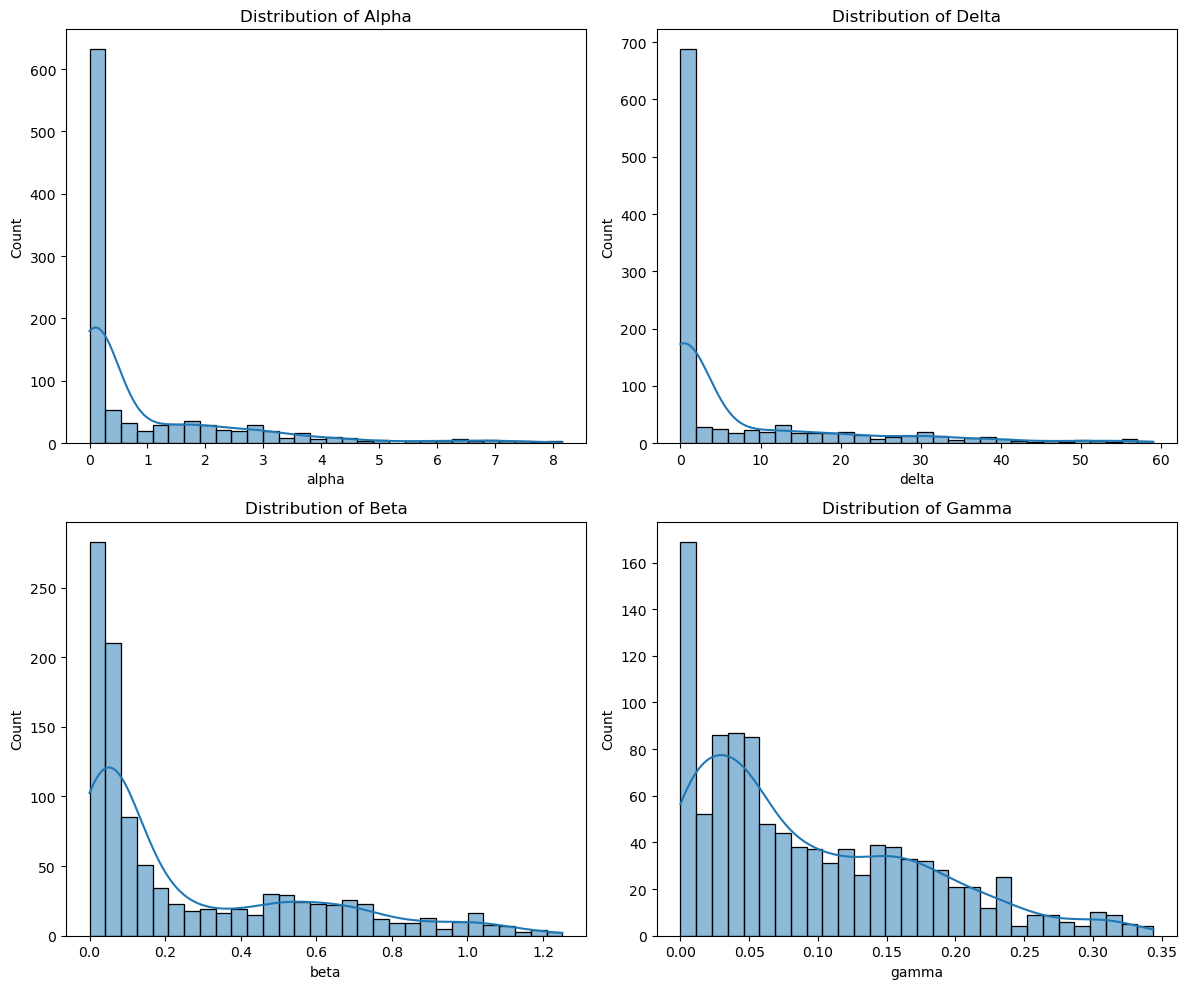

In [20]:
plt.figure(figsize=(12, 10))

# Vẽ các histogram cho các đặc trưng số (alpha, delta, beta, gamma)
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['alpha'], kde=True, bins=30)
plt.title('Distribution of Alpha')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['delta'], kde=True, bins=30)
plt.title('Distribution of Delta')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['beta'], kde=True, bins=30)
plt.title('Distribution of Beta')

plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['gamma'], kde=True, bins=30)
plt.title('Distribution of Gamma')

# Hiển thị các đồ thị
plt.tight_layout()
plt.show()


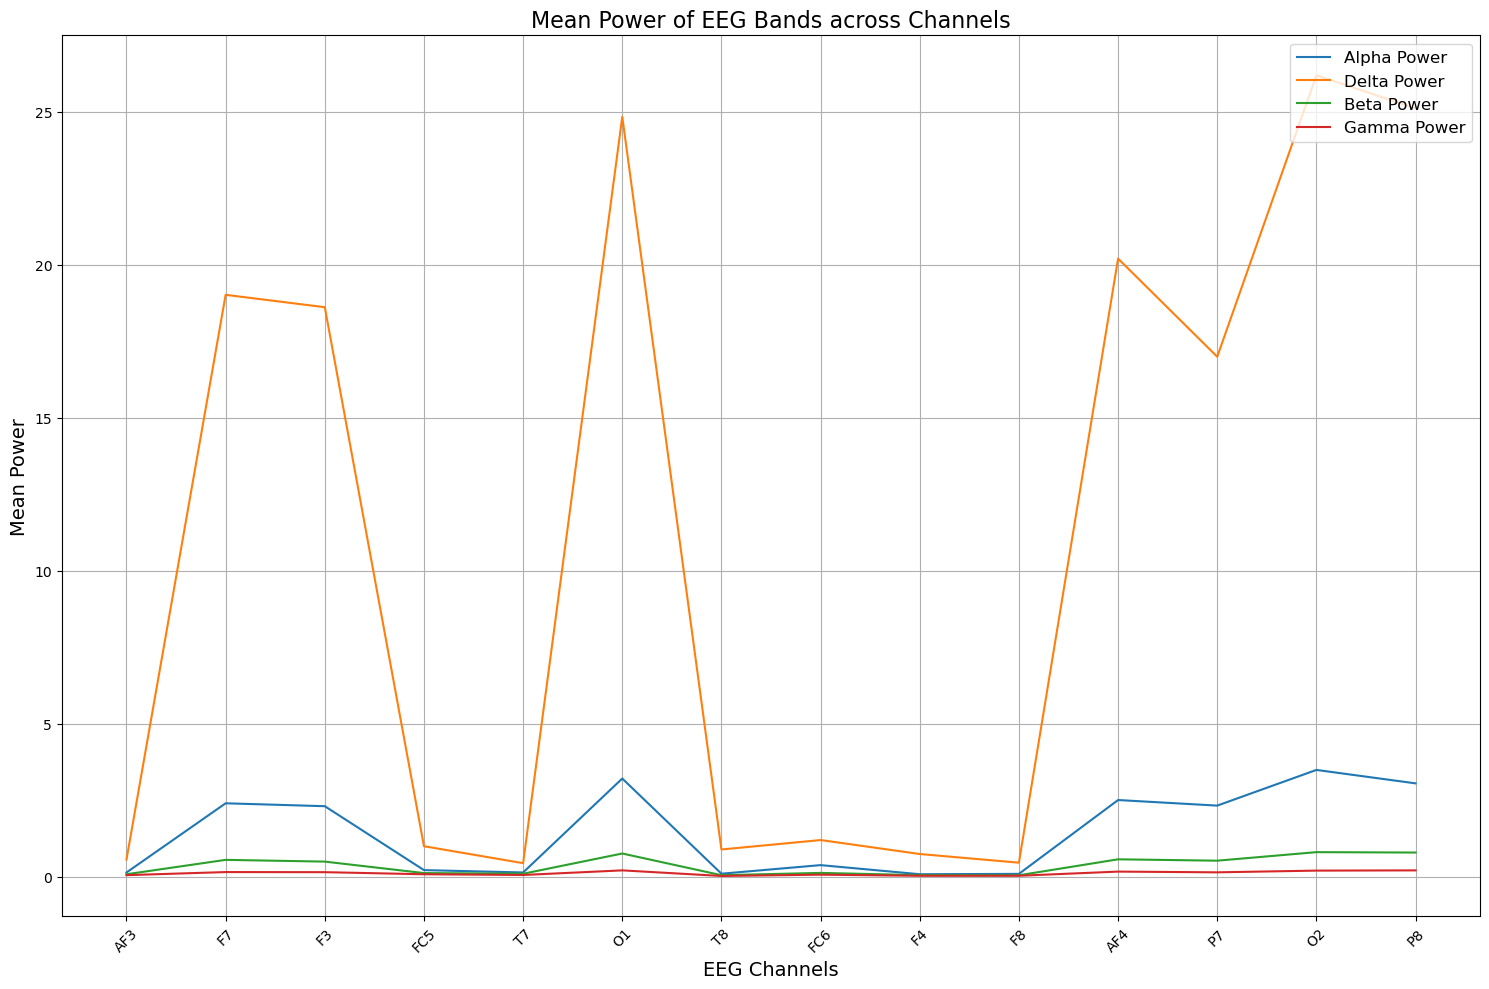

In [21]:

# Giả sử df là DataFrame chứa các cột 'alpha', 'delta', 'beta', 'gamma', 'channel'
# Lấy danh sách các kênh
channels = df_cleaned['channel'].unique()

# Tạo figure
plt.figure(figsize=(15, 10))

# Duyệt qua từng đặc trưng
features = ['alpha', 'delta', 'beta', 'gamma']
for feature in features:
    feature_values = []
    
    # Tính trung bình giá trị của đặc trưng theo từng kênh
    for ch in channels:
        mean_value = df_cleaned[df_cleaned['channel'] == ch][feature].mean()
        feature_values.append(mean_value)

    # Vẽ đường biểu diễn giá trị trung bình đặc trưng của từng kênh
    plt.plot(channels, feature_values, label=f'{feature.title()} Power')

# Thêm nhãn, tiêu đề, và chú thích
plt.xlabel('EEG Channels', fontsize=14)
plt.ylabel('Mean Power', fontsize=14)
plt.title('Mean Power of EEG Bands across Channels', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn kênh nếu cần
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


In [22]:
import numpy as np

# Giá trị giả định
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

# Tạo dữ liệu ngẫu nhiên (mỗi band có giá trị tại các kênh)
data = {
    band: np.random.rand(len(channels)) for band in bands
}


AttributeError: 'dict' object has no attribute 'ndim'

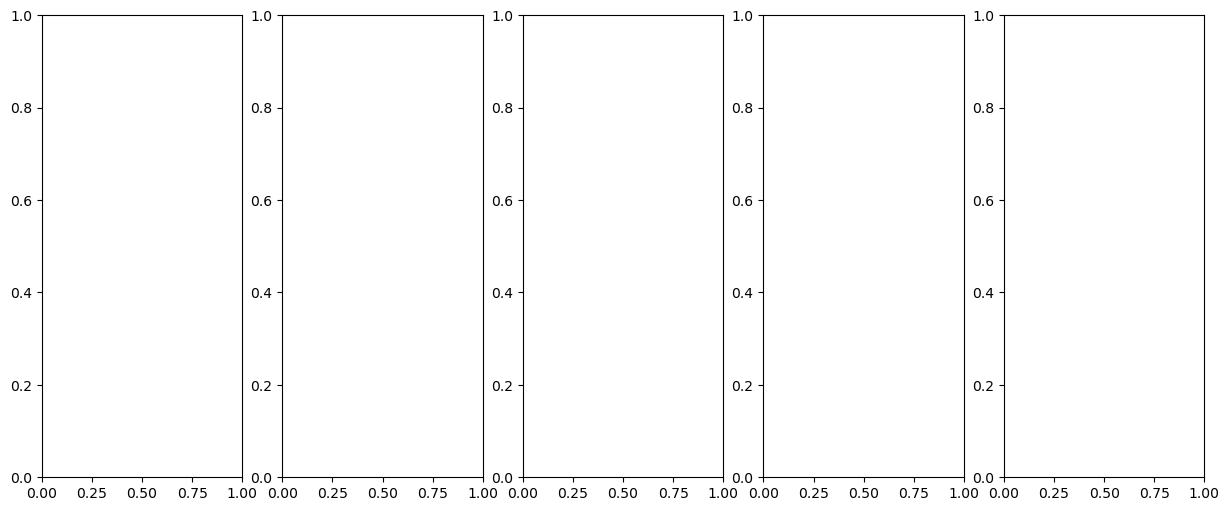

In [23]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Lấy danh sách kênh và giá trị bands từ DataFrame
channels = df_cleaned['channel'].tolist()
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Tạo montage (tọa độ kênh)
montage = mne.channels.make_standard_montage('standard_1020')
channel_positions = {ch: montage.get_positions()['ch_pos'][ch] for ch in channels}

# Vẽ biểu đồ topo cho từng band
fig, axes = plt.subplots(1, len(bands), figsize=(15, 6))  # Tạo lưới vẽ
for i, band in enumerate(bands):
    ax = axes[i]
    values = df[band].values  # Lấy giá trị của band hiện tại từ DataFrame
    mne.viz.plot_topomap(values, channel_positions, axes=ax, show=False, cmap='viridis')
    ax.set_title(band, fontsize=12)

# Thêm colorbar chung
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Vị trí của colorbar
norm = plt.Normalize(vmin=df[bands].min().min(), vmax=df[bands].max().max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)

plt.tight_layout()
plt.show()


- wavelet transform: shannon entrophy, wavelet energy, mean, variance, kurtosis, skewness
- Wavelet transform là một công cụ mạnh mẽ để phân tích tín hiệu EEG trong miền thời gian - tần số. Sau khi thực hiện wavelet transform, bạn có thể trích xuất các đặc điểm như Shannon entropy, wavelet energy, mean, variance, kurtosis, và skewness từ các coefficients của wavelet

In [24]:
import pywt
import numpy as np

def wavelet_transform(signal, wavelet='db4', level=4):
    # wavelet='db4' là Daubechies 4, phổ biến trong phân tích EEG
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs


In [26]:
def shannon_entropy(coeff):
    prob = np.abs(coeff) / np.sum(np.abs(coeff))  # Tính xác suất
    entropy = -np.sum(prob * np.log2(prob + 1e-12))  # Tính entropy
    return entropy


In [28]:
def wavelet_energy(coeff):
    return np.sum(np.square(coeff))


In [30]:
def compute_mean(coeff):
    return np.mean(coeff)


In [32]:
from scipy.stats import kurtosis

def compute_kurtosis(coeff):
    return kurtosis(coeff)
    

In [34]:
from scipy.stats import skew

def compute_skewness(coeff):
    return skew(coeff)


In [36]:
def extract_wavelet_features(signal, wavelet='db4', level=4):
    coeffs = wavelet_transform(signal, wavelet, level)
    
    features = {}
    for i, coeff in enumerate(coeffs):
        features[f'level_{i+1}_entropy'] = shannon_entropy(coeff)
        features[f'level_{i+1}_energy'] = wavelet_energy(coeff)
        features[f'level_{i+1}_mean'] = compute_mean(coeff)
        features[f'level_{i+1}_variance'] = compute_variance(coeff)
        features[f'level_{i+1}_kurtosis'] = compute_kurtosis(coeff)
        features[f'level_{i+1}_skewness'] = compute_skewness(coeff)
    
    return features


In [38]:
from scipy import signal
import pandas as pd
import numpy as np

# Định nghĩa các dải tần số
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50)
}

# Hàm tính năng lượng các băng tần
def get_powers(channel, FS=128):
    if channel.size == 0 or np.all(np.isnan(channel)):
        return {band: 0 for band in bands.keys()}  # Trả về 0 nếu dữ liệu không hợp lệ

    channel = channel - channel.mean()  # Trung bình hóa tín hiệu
    freq, psd = signal.periodogram(channel, fs=FS, nfft=256)

    powers = {}
    for band_name, band_limits in bands.items():
        low, high = band_limits
        band_psd = psd[(freq >= low) & (freq < high)]
        if band_psd.size > 0:
            powers[band_name] = band_psd.mean()
        else:
            powers[band_name] = 0  # Nếu không có giá trị, gán về 0
    return powers

# Giả sử get_data và channel_map đã được định nghĩa
rows_list = []
for subject_idx in range(1, 35):
    states = get_data(f"eeg_record{subject_idx}.mat")
    for ch_name, ch_idx in channel_map.items():
        for state, eeg in states.items():
            powers = get_powers(eeg[:, ch_idx])
            powers['state'] = state
            powers['channel'] = ch_name
            powers['subject'] = f"subject_{subject_idx}"
            powers['raw_signal'] = eeg[:, ch_idx].tolist()  # Lưu tín hiệu thô vào DataFrame
            rows_list.append(powers)

# Tạo DataFrame
df = pd.DataFrame(rows_list)


In [ ]:
df

In [ ]:
print(df['raw_signal'].head())
print(df['raw_signal'].apply(len).describe())  # Xem độ dài tín hiệu

In [ ]:
# Giữ lại các tín hiệu có độ dài > 0
df = df[df['raw_signal'].apply(lambda x: len(x) > 0)]

In [ ]:
import pywt
import numpy as np
from scipy.stats import kurtosis, skew

def extract_wavelet_features(signal, wavelet='db4', level=4):
    if len(signal) == 0:  # Bỏ qua tín hiệu rỗng
        return {f'wavelet_level_{i}_{stat}': np.nan 
                for i in range(level + 1) 
                for stat in ['energy', 'mean', 'var', 'kurt', 'skew']}
    
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        features = {}
        for i, coeff in enumerate(coeffs):
            features[f'wavelet_level_{i}_energy'] = np.sum(coeff ** 2)  # Năng lượng
            features[f'wavelet_level_{i}_mean'] = np.mean(coeff)       # Giá trị trung bình
            features[f'wavelet_level_{i}_var'] = np.var(coeff)         # Phương sai
            features[f'wavelet_level_{i}_kurt'] = kurtosis(coeff)      # Kurtosis
            features[f'wavelet_level_{i}_skew'] = skew(coeff)          # Skewness
        return features
    except Exception as e:
        print(f"Error processing signal: {e}")
        return {f'wavelet_level_{i}_{stat}': np.nan 
                for i in range(level + 1) 
                for stat in ['energy', 'mean', 'var', 'kurt', 'skew']}


In [45]:
from scipy.signal import butter, filtfilt

def bandpass_filter(eeg_signal, lowcut, highcut, FS, order=5):
    nyquist = 0.5 * FS
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, eeg_signal)
    return filtered_signal


In [47]:
def remove_mean(eeg_signal):
    return eeg_signal - np.mean(eeg_signal)


In [49]:
def normalize_signal(eeg_signal):
    return (eeg_signal - np.min(eeg_signal)) / (np.max(eeg_signal) - np.min(eeg_signal))


In [51]:
def segment_signal(eeg_signal, window_size, FS):
    window_samples = window_size * FS
    segments = []
    for i in range(0, len(eeg_signal), window_samples):
        segment = eeg_signal[i:i+window_samples]
        if len(segment) == window_samples:
            segments.append(segment)
    return np.array(segments)


In [53]:
def preprocess_eeg(eeg_signal, FS, lowcut=0.5, highcut=40, window_size=2):
    # Lọc tín hiệu
    filtered_signal = bandpass_filter(eeg_signal, lowcut, highcut, FS)
    
    # Loại bỏ trung bình tín hiệu
    cleaned_signal = remove_mean(filtered_signal)
    
    # Định chuẩn tín hiệu
    normalized_signal = normalize_signal(cleaned_signal)
    
    # Chia tín hiệu thành các cửa sổ
    segments = segment_signal(normalized_signal, window_size, FS)
    
    return segments


In [55]:
def get_band_powers(eeg_signal, FS):
    N = len(eeg_signal)  # Số mẫu tín hiệu
    fft_result = fft(eeg_signal)  # Fourier Transform
    positive_frequencies = np.fft.fftfreq(N, d=1/FS)[:N//2]  # Tần số dương
    fft_magnitude = np.abs(fft_result[:N//2])  # Biên độ phổ
    
    band_powers = {}
    for band, (low, high) in bands.items():
        band_indices = np.where((positive_frequencies >= low) & (positive_frequencies < high))
        band_powers[band] = np.sum(fft_magnitude[band_indices])  # Năng lượng trong dải tần
        
    return band_powers


In [63]:
import os
import scipy.io

data_root = "eeg_data"  # Đảm bảo đây là thư mục chính xác

# Lấy danh sách tất cả các tệp .mat trong thư mục
mat_files = [f for f in os.listdir(data_root) if f.endswith('.mat')]

rows_list = []

for mat_file in mat_files:
    # Kiểm tra đường dẫn đầy đủ
    mat_file_path = os.path.join(data_root, mat_file)
    print(f"Đang xử lý tệp: {mat_file_path}")  # In ra đường dẫn để kiểm tra

    states = get_data(mat_file_path)  # Đảm bảo cung cấp đường dẫn đầy đủ
    for ch_name, ch_idx in channel_map.items():
        for state, eeg in states.items():
            eeg_signal = eeg[:, ch_idx]  # Lấy tín hiệu của kênh ch_idx
            
            # Tiến hành preprocessing và tính toán band powers
            segments = preprocess_eeg(eeg_signal, FS)
            
            for segment in segments:
                band_powers = get_band_powers(segment, FS)
                band_powers['state'] = state
                band_powers['channel'] = ch_name
                band_powers['subject'] = mat_file  # Lưu tên tệp .mat vào cột subject
                rows_list.append(band_powers)

# Chuyển đổi kết quả thành DataFrame
df = pd.DataFrame(rows_list)
print(df.head())


Đang xử lý tệp: eeg_data\eeg_record1.mat


FileNotFoundError: [Errno 2] No such file or directory: 'eeg_data\\eeg_data\\eeg_record1.mat'